# Reducción de dimensionalidad

In [464]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [465]:
df = pd.read_csv('data/dataset_preprocessed(1).csv')
df.head(3)

,Unnamed: 0,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,...,time,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
0,0,2014-104,J,Female,NM,9.7584,9.7584,0.0,0.0,0.0000,...,1420.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
1,1,2014-105,J,Male,NM,3.9632,3.9632,0.0,0.0,0.0000,...,1420.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
2,2,2016-133,A,Female,AZ,5.4562,3.8238,0.0,0.0,0.6148,...,1700.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal


Inicializamos los escaladores para posteriormente realizar el mapeo de reducción de dimensionalidad.

In [468]:
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

In [469]:
df_subset =df.drop(columns = ['edad', 'sexo', 'estado', 'gap', 'id', 'Unnamed: 0', 'lon', 'lat'] )
df_subset_al = df_subset.drop(columns = ['time', 'dist camino',	'ppanual17',	'tmedia17',	'altitud',	'hcrop',	'hland'] )
X = scaler.fit_transform(np.array(df_subset))
X_al = scaler2.fit_transform(np.array(df_subset_al))

<Axes: xlabel='x', ylabel='y'>

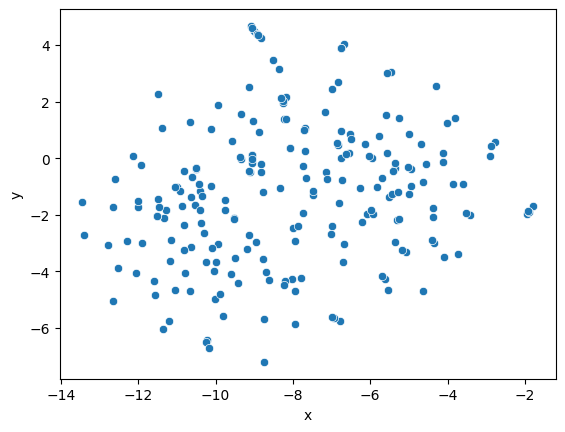

In [552]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=60, n_iter =3000, early_exaggeration= 100).fit_transform(X)

DF = pd.DataFrame(X_embedded, columns = ['x','y'])

sns.scatterplot(DF, x = 'x', y = 'y')

Realizaremos ahora el mismo procedimiento utilizando solamente los alimentos encontrados en la codorniz.

<Axes: xlabel='x', ylabel='y'>

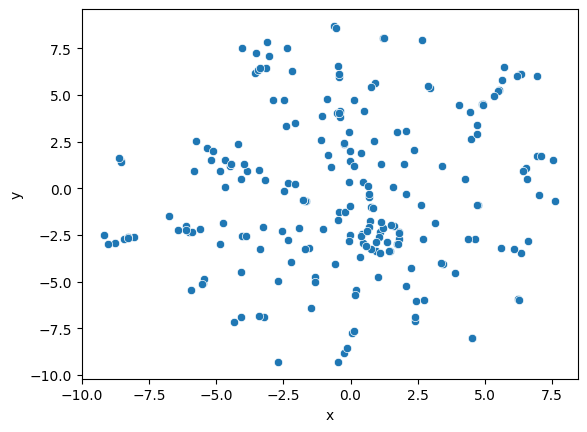

In [501]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=40, n_iter =700).fit_transform(X_al)

DF = pd.DataFrame(X_embedded, columns = ['x','y'])

sns.scatterplot(DF, x = 'x', y = 'y')

Aplicaremos el algoritmo de KMeans con 2 grupos al conjunto de datos X.

<Axes: xlabel='x', ylabel='y'>

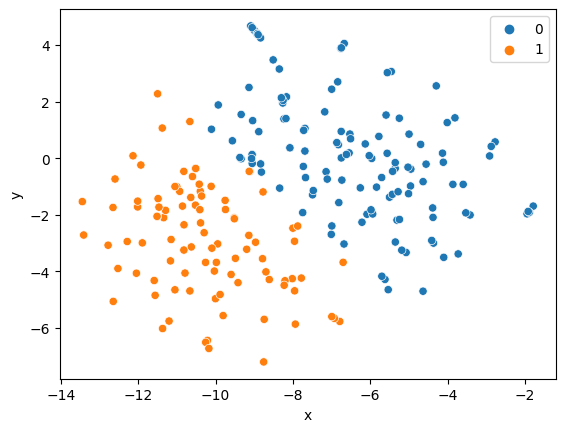

In [553]:
from sklearn.cluster import KMeans

import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_embedded)

kmeans.labels_

sns.scatterplot(DF, x = 'x', y = 'y', hue=kmeans.labels_)

In [558]:
df['label'] = kmeans.labels_

Realizamos ahora un arbol de decisión para obtener las variables que nos ayudan a distinguir mejor las 2 clases obtenidas.

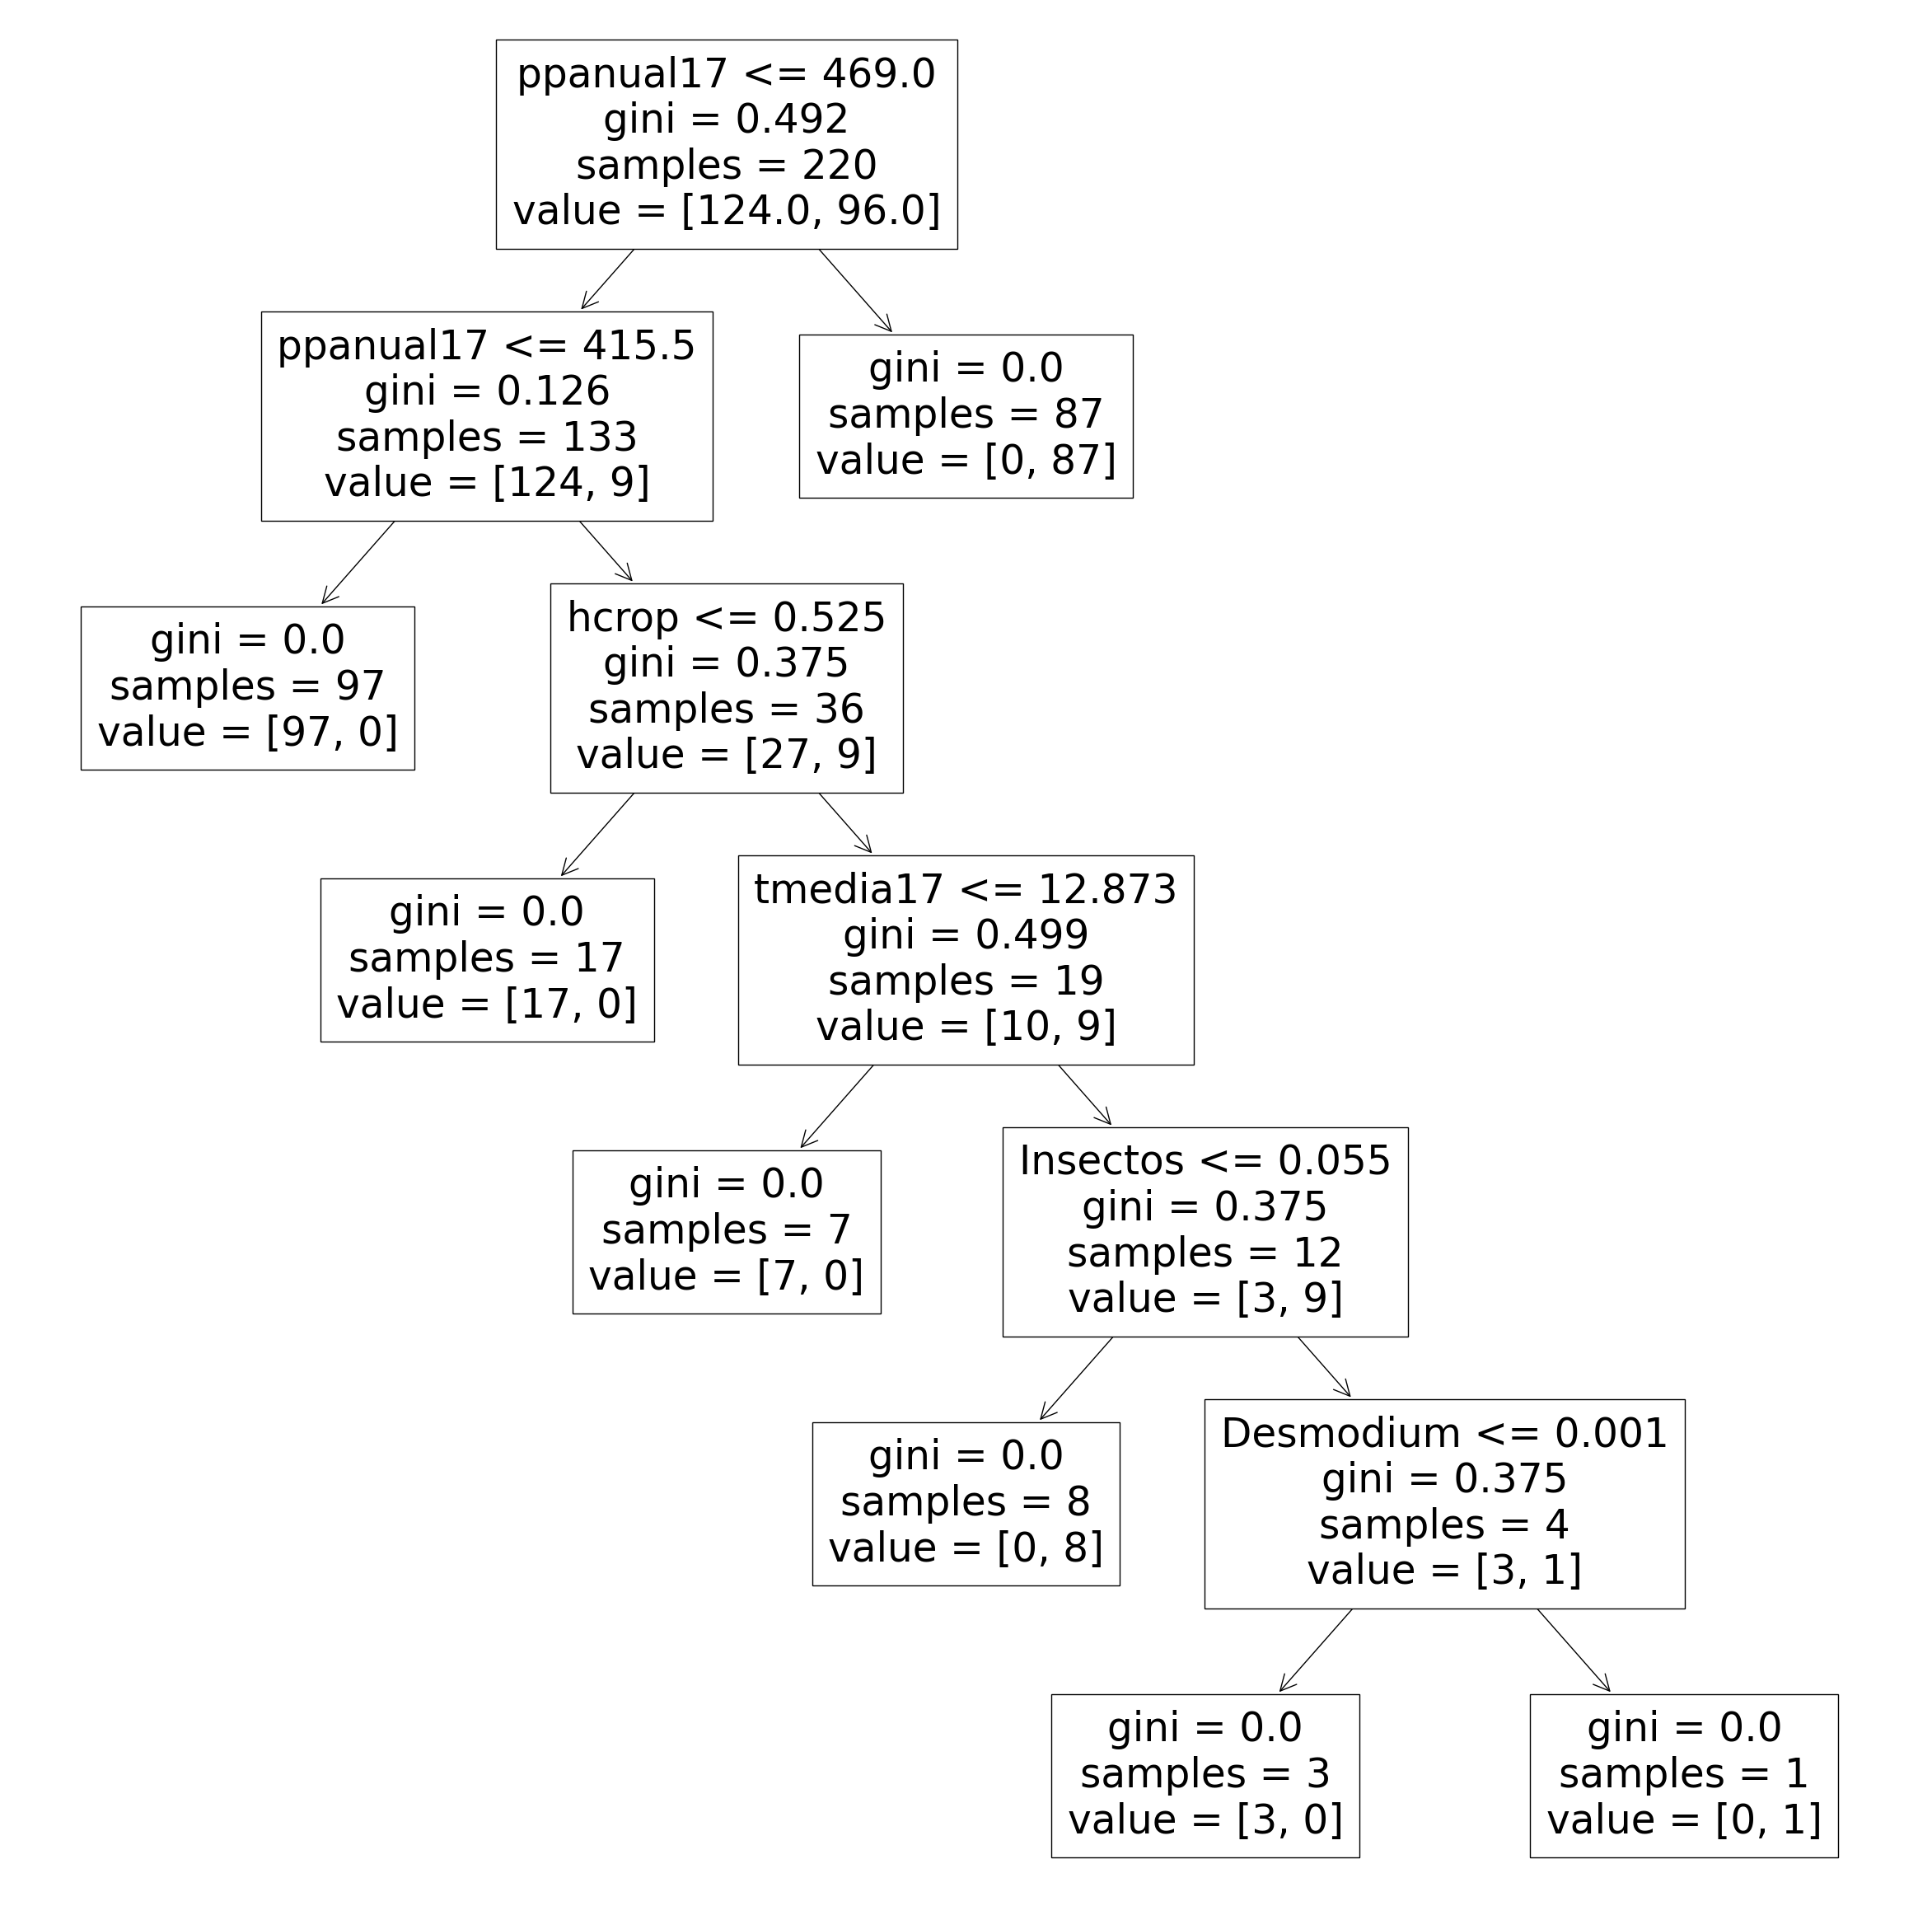

In [559]:
from sklearn import tree
import matplotlib.pyplot as plt

reg_tbpa = tree.DecisionTreeClassifier()
reg_tbpa.fit(df_subset, df['label'])
_, ax = plt.subplots(figsize=(30,30))
tree.plot_tree(reg_tbpa, feature_names=df_subset.columns)
plt.show()

In [562]:
df[df['label'] ==1]['estado'].value_counts()

estado
AZ    85
NM    11
Name: count, dtype: int64